In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pickle
import sys

In [3]:
crop = pd.read_csv('Crop_recommendation.csv')

In [ ]:
crop.columns

Index(['temperature', 'humidity', 'rainfall', 'label'], dtype='object')

In [21]:
crop.shape

(2200, 4)

In [24]:
crop.label.value_counts() #Balanced

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [10]:
crop.isnull().sum()

temperature    0
humidity       0
rainfall       0
label          0
dtype: int64

In [7]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2200 non-null   float64
 1   humidity     2200 non-null   float64
 2   rainfall     2200 non-null   float64
 3   label        2200 non-null   object 
dtypes: float64(3), object(1)
memory usage: 68.9+ KB


In [9]:
crop.describe()

,temperature,humidity,rainfall
count,2200.000000,2200.000000,2200.000000
mean,25.616244,71.481779,103.463655
std,5.063749,22.263812,54.958389
min,8.825675,14.258040,20.211267
25%,22.769375,60.261953,64.551686
50%,25.598693,80.473146,94.867624
75%,28.561654,89.948771,124.267508
max,43.675493,99.981876,298.560117


Temp->Looks normally distributed

rainfall->slightly skewd 

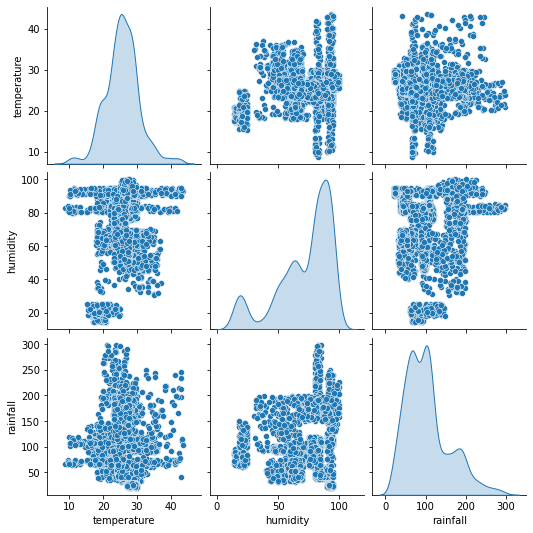

In [19]:
sns.pairplot(crop, diag_kind='kde') 

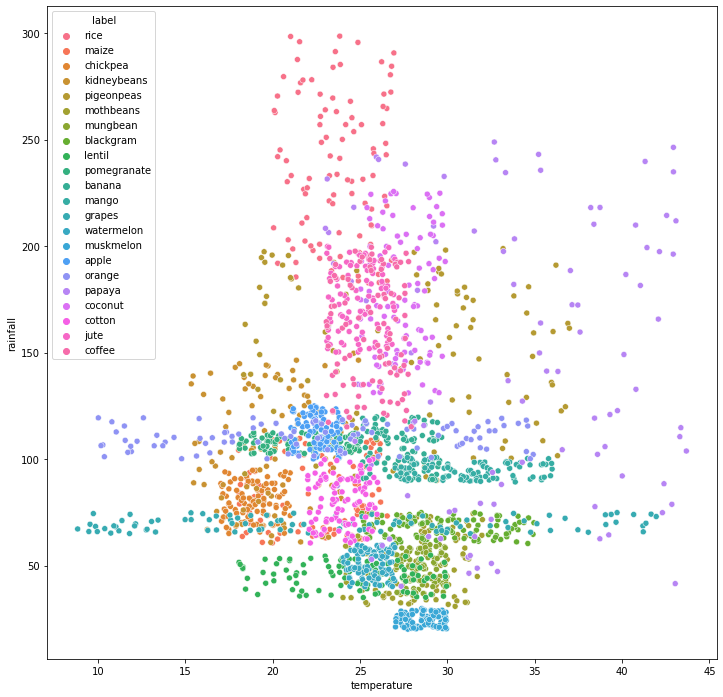

In [20]:
plt.figure(figsize=(12,12))
sns.scatterplot(x = crop.temperature, y= crop.rainfall, hue = crop.label)

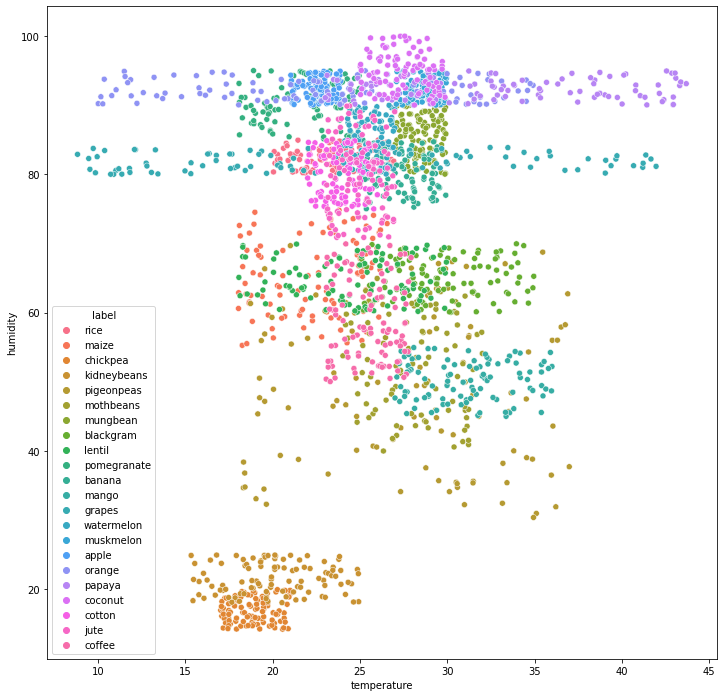

In [25]:
plt.figure(figsize=(12,12))
sns.scatterplot(x = crop.temperature, y= crop.humidity, hue = crop.label)

In [27]:
y=crop.label
x=crop.drop(['label'], axis=1)

In [28]:
x_scaled = x.apply(zscore)
x_scaled.describe()

,temperature,humidity,rainfall
count,2.200000e+03,2.200000e+03,2.200000e+03
mean,3.875688e-16,-1.808654e-16,1.550275e-16
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-3.316592e+00,-2.570842e+00,-1.515170e+00
25%,-5.623337e-01,-5.040636e-01,-7.081870e-01
50%,-3.466729e-03,4.039475e-01,-1.564454e-01
75%,5.817982e-01,8.296508e-01,3.786243e-01
max,3.567190e+00,1.280400e+00,3.550701e+00


SD became same

<Figure size 864x864 with 0 Axes>

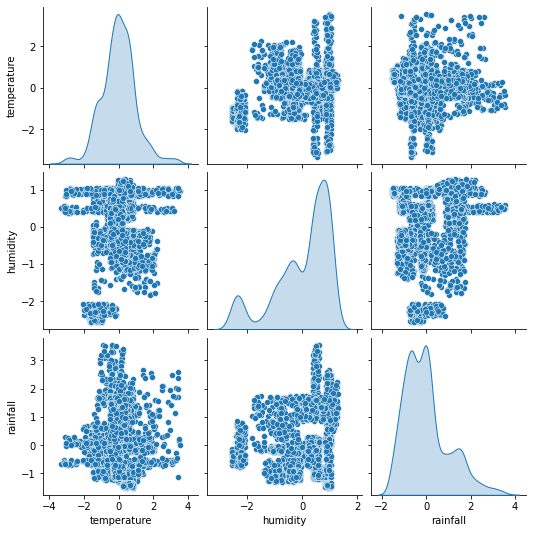

In [29]:
plt.figure(figsize=(12,12))
sns.pairplot(x_scaled,diag_kind='kde')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=1)

In [56]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

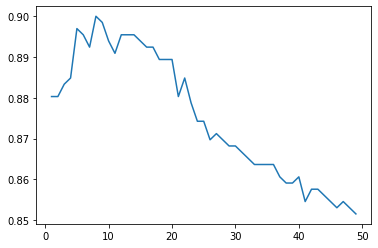

In [58]:
plt.plot(range(1,50),scores)

In [57]:
NNH = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8984848484848484